# Logistic Regression Assignment – Titanic
This notebook follows the assignment instructions step by step:
1. **Data Exploration (EDA)**
2. **Data Preprocessing**
3. **Model Building**
4. **Model Evaluation**
5. **Final Predictions on Hold-out Test Set**
6. **Interview Questions**

## 0) Setup

In [3]:
# Core
import os
import numpy as np
import pandas as pd

# Visualization (use matplotlib only; no seaborn)
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, classification_report
)

# Display all columns in pandas
pd.set_option("display.max_columns", None)

# Paths
DATA_DIR = "/mnt/data/logistic_regression_assignment/Logistic Regression"
TRAIN_CSV = os.path.join(DATA_DIR, "Titanic_train.csv")
TEST_CSV  = os.path.join(DATA_DIR, "Titanic_test.csv")

from IPython.display import display


## 1.Data Loading

In [5]:
train_df = pd.read_csv(r"Titanic_train.csv")
train_df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_df  = pd.read_csv(r"Titanic_test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
print(train_df.shape, test_df.shape)
train_df.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA Process

In [9]:
# Inspect dtypes and missing values
print("=== Info (train) ===")
print(train_df.dtypes)
print("\n=== Missing values (train) ===")
print(train_df.isna().sum())

print("\n=== Summary statistics (numeric, train) ===")
display(train_df.describe())

print("\n=== Class balance (Survived) ===")
print(train_df['Survived'].value_counts())
print(train_df['Survived'].value_counts(normalize=True))


=== Info (train) ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

=== Missing values (train) ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

=== Summary statistics (numeric, train) ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



=== Class balance (Survived) ===
Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


### 2.1 Visualization

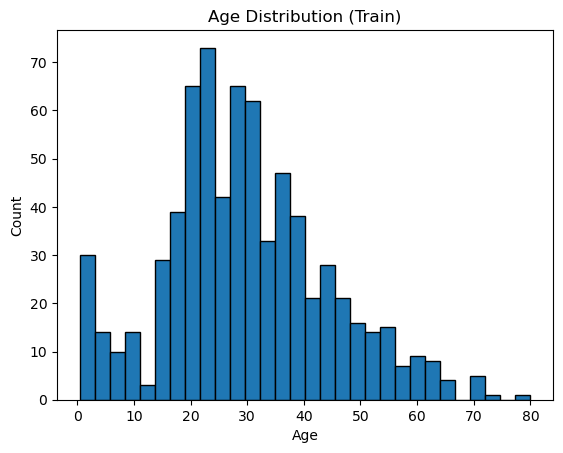

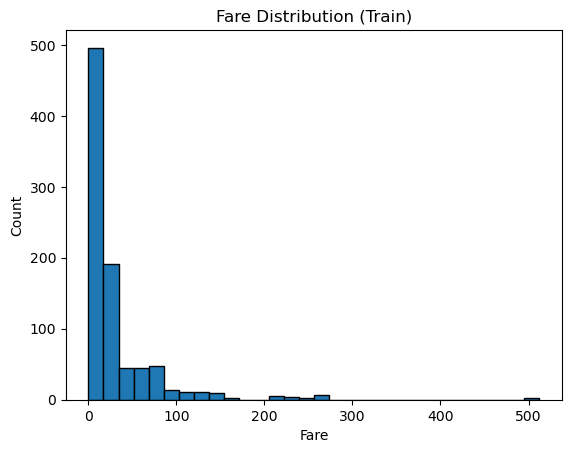

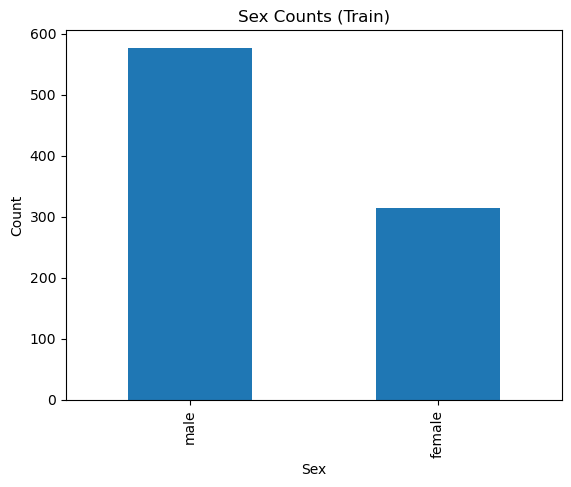

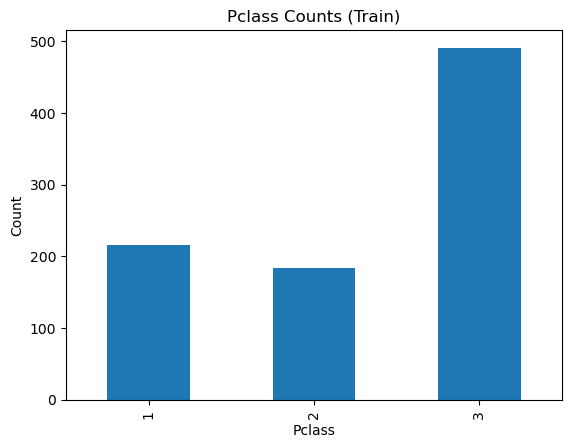

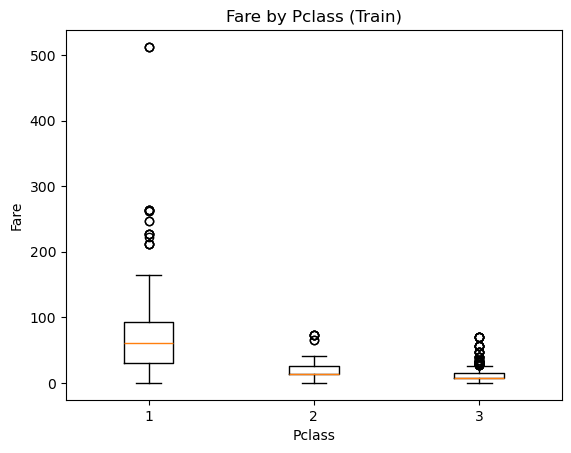

In [11]:
# Histogram: Age
plt.figure()
train_df['Age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Age Distribution (Train)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram: Fare
plt.figure()
train_df['Fare'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Fare Distribution (Train)')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Bar plot: Sex counts
plt.figure()
train_df['Sex'].value_counts().plot(kind='bar')
plt.title('Sex Counts (Train)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Bar plot: Pclass counts
plt.figure()
train_df['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title('Pclass Counts (Train)')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Box plot: Fare by Pclass
plt.figure()
# Prepare data for boxplot grouped by Pclass
fare_by_pclass = [train_df.loc[train_df['Pclass']==c, 'Fare'].dropna() for c in sorted(train_df['Pclass'].unique())]
plt.boxplot(fare_by_pclass, labels=sorted(train_df['Pclass'].unique()))
plt.title('Fare by Pclass (Train)')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

## 2.2 Relationship with Target (Survived)

Survival rate by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


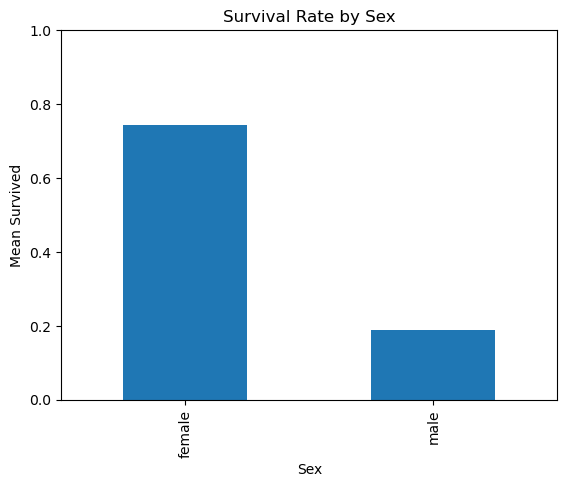


Survival rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


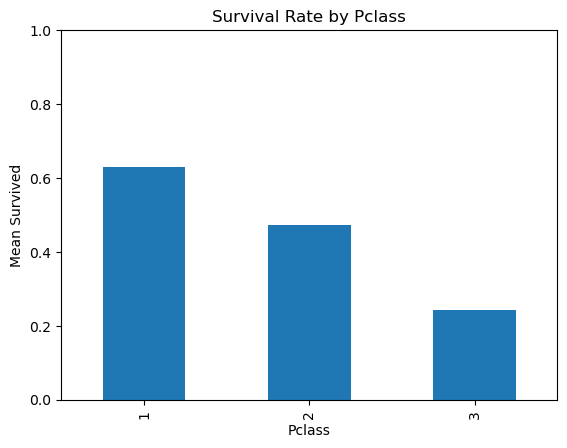

In [13]:
# Survival rate by Sex
surv_by_sex = train_df.groupby('Sex')['Survived'].mean()
print("Survival rate by Sex:\n", surv_by_sex)

plt.figure()
surv_by_sex.plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean Survived')
plt.ylim(0,1)
plt.show()

# Survival rate by Pclass
surv_by_pclass = train_df.groupby('Pclass')['Survived'].mean()
print("\nSurvival rate by Pclass:\n", surv_by_pclass)

plt.figure()
surv_by_pclass.sort_index().plot(kind='bar')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Mean Survived')
plt.ylim(0,1)
plt.show()


### 3.Preprocessing

In [15]:
# We'll define features and target
target_col = 'Survived'
X = train_df.drop(columns=[target_col])
y = train_df[target_col]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
# Identify numeric and categorical columns for preprocessing
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']
categorical_features = ['Sex', 'Embarked']
print(numeric_features,categorical_features)

['Age', 'SibSp', 'Parch', 'Fare', 'Pclass'] ['Sex', 'Embarked']


In [17]:
# We'll drop high-missing or less-informative text fields: Name, Ticket, Cabin, PassengerId
drop_features = ['Name', 'Ticket', 'Cabin', 'PassengerId']
drop_features

['Name', 'Ticket', 'Cabin', 'PassengerId']

In [18]:
# Preprocessors
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [19]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('drop', 'drop', drop_features)
    ],
    remainder='drop'  # any columns not listed will be dropped
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked']),
                                ('drop', 'drop',
                                 ['Name', 'Ticket', 'Cabin', 'PassengerId'])])

### 4.Model Building

Accuracy: 0.7932960893854749
Precision: 0.7666666666666667
Recall: 0.6666666666666666
F1-score: 0.7131782945736435
ROC-AUC: 0.8440052700922266

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion matrix:
 [[96 14]
 [23 46]]


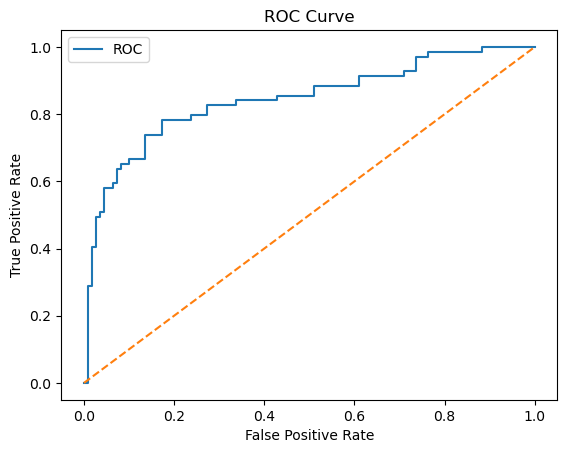

In [22]:
# Split train into train/validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build pipeline with Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')  # liblinear is good for small binary problems

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', log_reg)
])

pipe.fit(X_train, y_train)
y_valid_pred = pipe.predict(X_valid)
y_valid_proba = pipe.predict_proba(X_valid)[:, 1]

print("Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Precision:", precision_score(y_valid, y_valid_pred))
print("Recall:", recall_score(y_valid, y_valid_pred))
print("F1-score:", f1_score(y_valid, y_valid_pred))
print("ROC-AUC:", roc_auc_score(y_valid, y_valid_proba))

print("\nClassification report:\n", classification_report(y_valid, y_valid_pred))

# Confusion matrix
cm = confusion_matrix(y_valid, y_valid_pred)
print("\nConfusion matrix:\n", cm)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## 4.1Cross-Validation & Hyperparameter Tuning

In [24]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(pipe, X, y, cv=cv, scoring='roc_auc')
print("Cross-validated ROC-AUC scores:", cv_auc)
print("Mean ROC-AUC:", cv_auc.mean())

# Simple hyperparameter grid search
param_grid = {
    'model__C': [0.01, 0.1, 1.0, 10.0],
    'model__penalty': ['l1', 'l2'],  # with liblinear
}

grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid.fit(X, y)

print("Best params:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)
best_model = grid.best_estimator_


Cross-validated ROC-AUC scores: [0.87397892 0.84812834 0.83108289 0.82680481 0.88060098]
Mean ROC-AUC: 0.8521191892647112
Best params: {'model__C': 10.0, 'model__penalty': 'l2'}
Best CV ROC-AUC: 0.8521409927426025


## 4.2 Evaluate Best Model on Validation Set

Accuracy: 0.8044692737430168
Precision: 0.7833333333333333
Recall: 0.6811594202898551
F1-score: 0.7286821705426356
ROC-AUC: 0.8524374176548091

Confusion matrix:
 [[97 13]
 [22 47]]


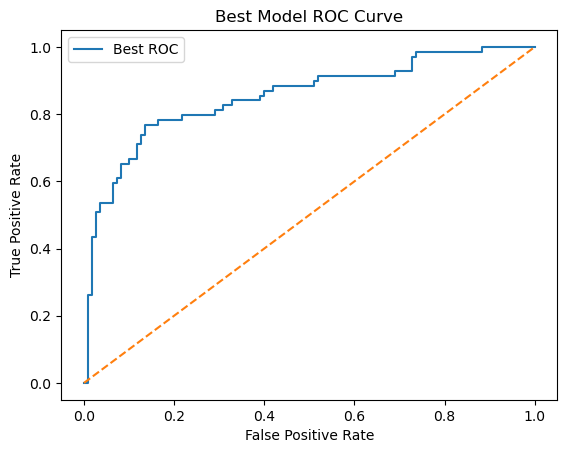

In [26]:
y_valid_pred_best = best_model.predict(X_valid)
y_valid_proba_best = best_model.predict_proba(X_valid)[:, 1]

print("Accuracy:", accuracy_score(y_valid, y_valid_pred_best))
print("Precision:", precision_score(y_valid, y_valid_pred_best))
print("Recall:", recall_score(y_valid, y_valid_pred_best))
print("F1-score:", f1_score(y_valid, y_valid_pred_best))
print("ROC-AUC:", roc_auc_score(y_valid, y_valid_proba_best))

cm_best = confusion_matrix(y_valid, y_valid_pred_best)
print("\nConfusion matrix:\n", cm_best)

fpr, tpr, thresholds = roc_curve(y_valid, y_valid_proba_best)
plt.figure()
plt.plot(fpr, tpr, label='Best ROC')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Best Model ROC Curve')
plt.legend()
plt.show()

## 5) Train on Full Data & Predict on Provided Test Set

In [28]:
# Refit best model on full training data
best_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare', 'Pclass']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('drop', 'drop',
                                                  ['Name', 'Ticket', 'Cabin',
                                                   'PassengerId'])])),
                ('model',
                 LogisticRegression(C=10.0, max_iter=1000,
                                    solver='liblinear'))])

In [29]:
# Predict on provided Titanic_test.csv (note: it has no Survived label)
test_pred = best_model.predict(test_df)
test_proba = best_model.predict_proba(test_df)[:, 1]
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [30]:
test_proba

array([0.10209633, 0.35587477, 0.10501048, 0.09837264, 0.57152649,
       0.15258633, 0.67173932, 0.1879572 , 0.77707549, 0.06925102,
       0.09487595, 0.32303228, 0.93447946, 0.05725629, 0.84428127,
       0.86091489, 0.24990816, 0.17019211, 0.54427133, 0.55247176,
       0.28191761, 0.16439248, 0.93594203, 0.64760732, 0.90090126,
       0.03197035, 0.96404893, 0.16220196, 0.36861812, 0.07805636,
       0.09100183, 0.16612356, 0.44812814, 0.49751423, 0.50567253,
       0.18420056, 0.61359484, 0.6754326 , 0.10557301, 0.10405371,
       0.08673838, 0.48832982, 0.05978286, 0.8146827 , 0.85184415,
       0.10525967, 0.42798205, 0.12736989, 0.87535311, 0.49741098,
       0.46370913, 0.32877337, 0.75936881, 0.88274855, 0.32059644,
       0.0710599 , 0.07415006, 0.10520505, 0.07167274, 0.96318737,
       0.13792889, 0.21203003, 0.13338528, 0.7357179 , 0.64635884,
       0.82842384, 0.76457678, 0.32219145, 0.56111727, 0.77778741,
       0.72050966, 0.12064014, 0.60437762, 0.58421211, 0.96066

In [31]:
# Build submission-style CSV
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_pred
})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 6) Interview Questions – Short Answers

### Q1. What is the difference between precision and recall?

   *Precision measures, out of all predicted positives, how many were truly positive. It answers: When the model says “positive”, how often is it correct?
   *Recall (a.k.a. sensitivity) measures, out of all actual positives, how many did the model correctly identify. It answers: How many of the real positives did we catch?
### Q2. What is cross-validation, and why is it important in binary classification?

   *Cross-validation splits the training data into multiple folds, trains on a subset, and validates on the remaining fold, rotating through all folds.
   *It gives a more reliable estimate of out-of-sample performance (reducing variance from a single train/validation split), helps with model selection and hyperparameter tuning, and can reveal overfitting.
### Notes
  *We used a Pipeline + ColumnTransformer to ensure preprocessing is applied consistently in training and inference.
  *We dropped high-missing and less-informative free-text columns (Name, Ticket, Cabin) for a clean baseline. You can engineer richer features (e.g., titles from Name) to improve performance.
  *Since the provided test file has no Survived column, we evaluated using an 80/20 split on the given training data and produced predictions for the separate test file.

In [34]:
## Deployment

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('model', LogisticRegression())
])

In [36]:
import pickle

# Save the entire pipeline (preprocessor + logistic regression model)
with open("log_reg_pipeline.pkl", "wb") as f:
    pickle.dump(pipe, f)

print("✅ Model pipeline saved as log_reg_pipeline.pkl")


✅ Model pipeline saved as log_reg_pipeline.pkl


In [48]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Load the saved model
with open("log_reg_pipeline.pkl", "rb") as f:
    model = pickle.load(f)

app = Flask(__name__)

@app.route('/')
def home():
    return "🚀 Logistic Regression Model Deployment Successful!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = np.array(data['features']).reshape(1, -1)  # input should be a list of features
    prediction = model.predict(features)
    return jsonify({"prediction": prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [52]:
!curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d '{"features":[5.1,3.5,1.4,0.2]}'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
curl: (7) Failed to connect to 127.0.0.1 port 5000 after 2020 ms: Couldn't connect to server
